STEP1: CREATING A DATASET

In [ ]:
import numpy as np
import pandas as pd


# Creating a dataset
data = {
    'House_Size': [1200, 1400, 1600, 1900, np.nan, 3200],
    'House_Rate': [320000, 360000, np.nan, 890000, 900000, 1200000],  # Added missing value
    'Age': [10, 15, 18, 19, 20, 25],
    'Bedrooms': [2, 4, 4, 5, 6, 7]
}

df = pd.DataFrame(data)
print("Initial Dataset:\n", df)


Initial Dataset:
    House_Size  House_Rate  Age  Bedrooms
0      1200.0    320000.0   10         2
1      1400.0    360000.0   15         4
2      1600.0         NaN   18         4
3      1900.0    890000.0   19         5
4         NaN    900000.0   20         6
5      3200.0   1200000.0   25         7


STEP2:hANDLING THE MISSING VALUES IN DATASET USING MEAN IMPUTATION 

In [ ]:
from sklearn.impute import SimpleImputer
#parameter tells it to replace missing values with the mean of the respective colmn
#creating the imputer object
imputer = SimpleImputer(strategy='mean')
#This creates an imputer that will fill missing values with the mean of each column.
#Applying imputer to the dataset
df[['House_Size','House_Rate']] = imputer.fit_transform(df[['House_Size','House_Rate']])
#fit calcute the mean of House_size
#transform replace any NaN values with the calculated mean
print("Dataset after handing missing data:\n",df)




Dataset after handing missing data:
    House_Size  House_Rate  Age  Bedrooms
0      1200.0    320000.0   10         2
1      1400.0    360000.0   15         4
2      1600.0    734000.0   18         4
3      1900.0    890000.0   19         5
4      1860.0    900000.0   20         6
5      3200.0   1200000.0   25         7


STEP3:MEAN ABSOLUTE ERROR:

In [13]:
from sklearn.metrics import mean_absolute_error
y_actual = [320000,360000,560000,890000,900000,1200000]
y_predict = [330000,350000,550000,880000,910000,1180000]

MAE = mean_absolute_error(y_actual,y_predict)
print("MAE:",MAE)

MAE: 11666.666666666666


STEP3: MEAN SQUARED ERROR

In [14]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_actual,y_predict)
print("MSE: " , MSE)

MSE:  150000000.0


STEP4:ROOT MEAN SQUARED ERROR

In [15]:
RMSE = np.sqrt(MSE)
print("RMSE:",RMSE)

RMSE: 12247.44871391589


step5: R-Squared(R^2 Score)

In [16]:
from sklearn.metrics import r2_score
R2 = r2_score(y_actual,y_predict)
print("R-squared: ",R2)

R-squared:  0.9985137478325489


B:Model Evaluation for Classification
1: Accuracy 

In [21]:
from sklearn.metrics import accuracy_score
y_actual = [1,0,1,1,0,1]
y_predicted=[1,1,0,1,1,1]
Acuracy = accuracy_score(y_actual,y_predicted)
print("Accuracy:",Acuracy)

Accuracy: 0.5


2:PRECISION,RECALL AND F1 SCORE


In [25]:
from sklearn.metrics import precision_score,recall_score,f1_score
# Precision measures how many of the predicted positive cases were actually positive.
Precision = precision_score(y_actual,y_predicted)
#Recall measures how many actual positive cases were correctly predicted.
Recall = recall_score(y_actual,y_predicted)
#Balance Between Precision & Recall
F1_SCore = f1_score(y_actual,y_predicted)
print("Precision: " , Precision)
print("Recall: ", Recall)
print("F1_Score: ",F1_SCore)



Precision:  0.6
Recall:  0.75
F1_Score:  0.6666666666666666


3:RECEIVER OPERATING CHARACTERISTICS - AREA UNDER THE CURVE

ROC-AUC Score: 0.5


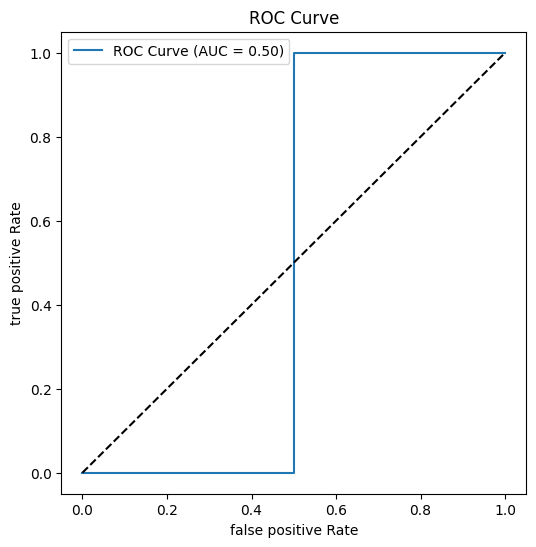

In [30]:
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt

#actual values(1=positive and 0=negative)
y_actual = [1,0,1,1,0,1]
#y_predicted probabilities from a model
y_pre_prob = [0.97,0.99,0.89,0.70,0.30,0.88]

AUC_score = roc_auc_score(y_actual,y_pre_prob)
print("ROC-AUC Score:",AUC_score)

fbr , tbr , _ = roc_curve(y_actual,y_pre_prob)

plt.figure(figsize=(6,6))
plt.plot(fbr,tbr, label="ROC Curve (AUC = {:.2f})".format(AUC_score))
plt.plot([0,1],[0,1],'k--')
plt.xlabel("false positive Rate")
plt.ylabel("true positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Plote the ROC Curve

